## Week 2 Part 1 Assignment

### Alice Ding, Shoshana Farber, Christian Uriostegui

This week's assignment is to:

1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.


For our dataset, we found a [Marvel Universe Social Network](https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network) dataset from Kaggle. We'll be using a subset of nodes and edges in order to complete this assignment.

In [1]:
# Step 1: Importing relevant packages and loading the data

import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

nodes = pd.read_csv('https://raw.githubusercontent.com/addsding/cuny-data620/main/assignment3/nodes.csv')
edges = pd.read_csv('https://raw.githubusercontent.com/addsding/cuny-data620/main/assignment3/edges.csv')
hero_network = pd.read_csv('https://raw.githubusercontent.com/addsding/cuny-data620/main/assignment3/hero-network.csv')

In [2]:
# Step 2: Filter down to a few heroes to subset the data; we'll look at Spiderman, Dr. Strange, and Iron Man
np.random.seed(42)

spider_man = hero_network[hero_network['hero1']=='SPIDER-MAN/PETER PAR'].sample(50)
dr_strange = hero_network[hero_network['hero1']=='DR. STRANGE/STEPHEN '].sample(50)
iron_man = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')].sample(50)

data = pd.concat([spider_man, dr_strange, iron_man], axis = 0)

print(data.head())

                       hero1                hero2
248703  SPIDER-MAN/PETER PAR       ROBERTSON, JOE
18771   SPIDER-MAN/PETER PAR    JAMESON, J. JONAH
278263  SPIDER-MAN/PETER PAR    JAMESON, J. JONAH
495036  SPIDER-MAN/PETER PAR    LEADER/SAM STERNS
137240  SPIDER-MAN/PETER PAR  KINGPIN/WILSON FISK


In [3]:
# Step 3: Basic graph analysis

# We'll be looking at the diameter, center, and eccentricity

# Diameter = maximum eccentricity
# Center = the set of nodes with eccentricity equal to radius
# Eccentricity = The eccentricity of a node v is the maximum distance from v to all other nodes in G

G = nx.from_pandas_edgelist(data, 'hero1', 'hero2')
diameter = nx.diameter(G)
center = nx.center(G)
eccentricity = nx.eccentricity(G)
print('Diameter = ', diameter)
print('Center = ', center)
print('Eccentricity = ', eccentricity)

Diameter =  4
Center =  ['SPIDER-MAN/PETER PAR', 'KINGPIN/WILSON FISK', 'WATSON-PARKER, MARY ', 'COLOSSUS II/PETER RA', 'CAPTAIN AMERICA', 'BLACK WIDOW/NATASHA ', 'INVISIBLE WOMAN/SUE ', 'BEAST/HENRY &HANK& P', 'DR. STRANGE/STEPHEN ', 'IRON MAN/TONY STARK ']
Eccentricity =  {'SPIDER-MAN/PETER PAR': 3, 'ROBERTSON, JOE': 4, 'JAMESON, J. JONAH': 4, 'LEADER/SAM STERNS': 4, 'KINGPIN/WILSON FISK': 3, 'JOHNSON, ANNA': 4, 'PARKER, MAY': 4, 'WATSON-PARKER, MARY ': 3, 'COLOSSUS II/PETER RA': 3, 'OSBORN, HARRY': 4, 'CAPTAIN AMERICA': 3, 'MAN-THING/THEODORE T': 4, 'BLACK WIDOW/NATASHA ': 3, 'WOLVERINE/LOGAN ': 4, 'OSBORN, NORMIE': 4, 'BANNON, LANCE': 4, 'GRANT, GLORIA GLORY': 4, 'URICH, BEN': 4, 'THOMPSON, EUGENE FLA': 4, 'MASTERS, ALICIA REIS': 4, 'HENSHAW, CURTIS': 4, 'INVISIBLE WOMAN/SUE ': 3, 'HUMAN TORCH/JOHNNY S': 4, 'QUASAR III/WENDELL V': 4, 'HIBBERT, HOPE': 4, 'CARPENTER, LARRY': 4, 'HOGUN [ASGARDIAN]': 4, 'GIGANTUS': 4, 'JAMESON, MARLA MADIS': 4, 'BLACK CAT/FELICIA HA': 4, 'WASP/JANET VA

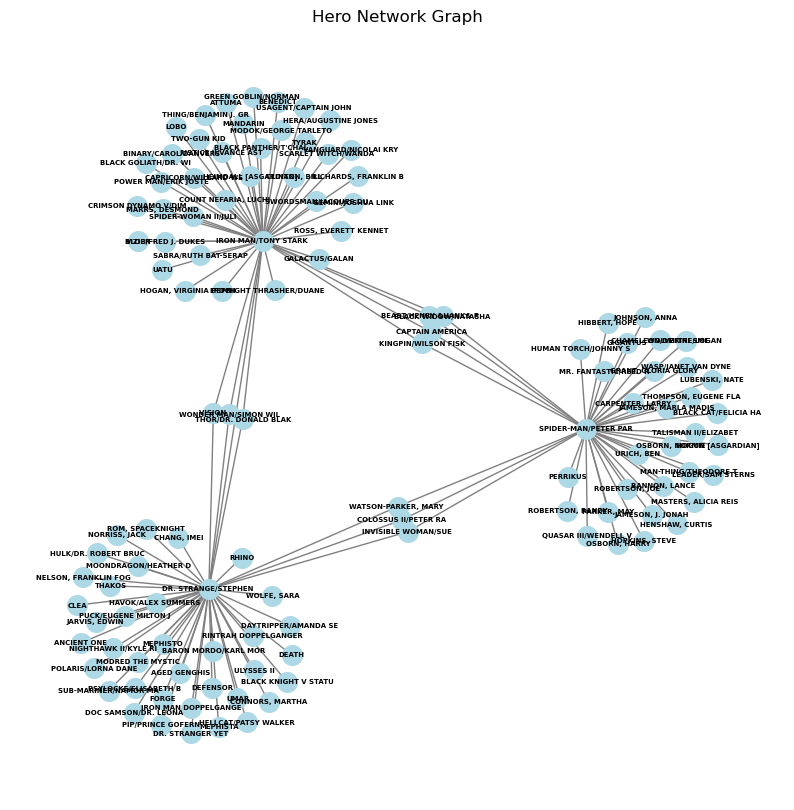

In [4]:
# Step 4: Visualize graph network

# Using the nodes and edges stored in G, we can then place it in a graph object

nx.Graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=5, font_weight='bold', edge_color='gray')
plt.title("Hero Network Graph")
plt.axis('off')
plt.show()